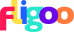

<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or custumer identification were deleted.

**Take-Home Goals**

#### Part 1
During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
  - **Expected**:
    - Make at least 10 plots with any ploting library (plotly, matplotlib, seaborn, etc.)
    - Write down the conclusions, in a clear manner, of every plot in this notebook

#### Part 2
In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - **Feature extraction:** Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
      - **Expected**:
        - Create **one** scikit-learn pipeline inside a file called `pipelines.py`
        - Create at least **three** scikit-learn transformers inside a file called `transformers.py` and use them inside the pipeline from previous step. This transformers should add new features or clean the original dataframe of this take-home
          - Feature example: Compute "total_nights" feature. This is the sum of `stays_in_week_nights` + `stays_in_weekend_nights`
          - Cleaning example: Transform string values. `'0'` to int type `0` 
        - Import pipeline and run the transformations inside this notebook

  - **Machine Learning modeling:** Fit models with the given data. Pay attention to the entire process to avoid missing any crucial step. You could use the `children` column as target.
    - **Expected**:
      - Use the dataset with the new features generated to train *at least* **three** different machine learning models and generate metrics about their performance.
    
#### Part 3
Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  - **Expected**:
    - Create a summary of all the findings in part 1
    - Create an explanation of the features added in part 2
    - Create a summary of the model metrics
    - These explanations should be at high level and understood by a non-technical person
    - You can add all the summaries and explanations at the end of this notebook, it can be done in markdown format or any other external resource like a ppt presentation, pdf document, etc. Whatever works best for you!

 
**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Virtualenv, requirements or Conda environment for isolation.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- Shap Model explanability: explain feature importance with the use of shapley values

## Part I - Exploratory Data Analisys

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Pipelines
from sklearn.pipeline import Pipeline
#Preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.feature_selection import SelectorMixin
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(transform_output="pandas")
pd.set_option('display.max_columns', None)


from sklearn.model_selection import train_test_split
#Modelado
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import shap

from sklearn.metrics import classification_report, confusion_matrix

sns.set()

In [2]:

# from pipelines import <your_pipeline_name>

hotels = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv')

In [3]:
hotels

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date
0,City_Hotel,217,1,3,2,none,BB,DEU,Offline_TA/TO,TA/TO,0,0,0,A,A,0,No_Deposit,0,Transient-Party,80.75,none,1,2016-09-01
1,City_Hotel,2,0,1,2,none,BB,PRT,Direct,Direct,0,0,0,D,K,0,No_Deposit,0,Transient,170.00,none,3,2017-08-25
2,Resort_Hotel,95,2,5,2,none,BB,GBR,Online_TA,TA/TO,0,0,0,A,A,2,No_Deposit,0,Transient,8.00,none,2,2016-11-19
3,Resort_Hotel,143,2,6,2,none,HB,ROU,Online_TA,TA/TO,0,0,0,A,A,0,No_Deposit,0,Transient,81.00,none,1,2016-04-26
4,Resort_Hotel,136,1,4,2,none,HB,PRT,Direct,Direct,0,0,0,F,F,0,No_Deposit,0,Transient,157.60,none,4,2016-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Resort_Hotel,172,0,2,2,children,BB,PRT,Direct,Direct,0,0,0,A,A,1,No_Deposit,0,Transient,73.39,none,1,2016-10-07
49996,Resort_Hotel,48,0,4,2,none,FB,PRT,Direct,Direct,0,0,0,A,B,2,No_Deposit,0,Transient,158.00,none,0,2015-09-01
49997,City_Hotel,155,0,4,2,none,BB,DEU,Offline_TA/TO,TA/TO,0,0,0,A,A,0,No_Deposit,0,Transient,82.50,none,1,2017-07-26
49998,Resort_Hotel,140,2,5,2,none,HB,GBR,Direct,Direct,0,0,0,G,G,0,No_Deposit,0,Transient,143.00,none,0,2016-04-28


In [4]:
# We are only left with users who stayed at the hotel, if the variables stays_in_weekend_nights and stays_in_week_nights are both zero
# we can assume that they did not stay at the hotel
hotels = hotels[(hotels.stays_in_weekend_nights!=0) | (hotels.stays_in_week_nights!=0)].copy()

In [5]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49552 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           49552 non-null  object 
 1   lead_time                       49552 non-null  int64  
 2   stays_in_weekend_nights         49552 non-null  int64  
 3   stays_in_week_nights            49552 non-null  int64  
 4   adults                          49552 non-null  int64  
 5   children                        49552 non-null  object 
 6   meal                            49552 non-null  object 
 7   country                         49266 non-null  object 
 8   market_segment                  49552 non-null  object 
 9   distribution_channel            49552 non-null  object 
 10  is_repeated_guest               49552 non-null  int64  
 11  previous_cancellations          49552 non-null  int64  
 12  previous_bookings_not_canceled  

In [6]:
# Setting arrival_date in date format 
# Creating a new variable to indicate the month and year of the stay
hotels["arrival_date"] =pd.to_datetime(hotels.arrival_date)

hotels["month_visit"] = hotels['arrival_date'].dt.strftime('%Y-%m')

In [7]:
hotels.describe(datetime_is_numeric=True)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,total_of_special_requests,arrival_date
count,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552
mean,80.559917,0.936915,2.486822,1.832640,0.039615,0.016770,0.203261,0.295124,1.584598,100.845922,0.714340,2016-08-25 23:13:07.536325632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,2015-07-01 00:00:00
25%,9.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,2016-03-08 00:00:00
50%,46.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.315000,1.000000,2016-08-30 00:00:00
75%,126.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.100000,1.000000,2017-03-11 00:00:00
max,709.000000,19.000000,50.000000,4.000000,1.000000,13.000000,72.000000,21.000000,379.000000,510.000000,5.000000,2017-08-31 00:00:00
std,91.300715,0.996845,1.930611,0.506603,0.195055,0.288878,1.808822,0.740163,14.856253,48.326504,0.834387,NaN


In [8]:
hotels.describe(include="object")

,hotel,children,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,month_visit
count,49552,49552,49552,49266,49552,49552,49552,49552,49552,49552,49552,49552
unique,2,2,5,154,7,5,9,10,3,4,2,26
top,City_Hotel,none,BB,PRT,Online_TA,TA/TO,A,A,No_Deposit,Transient,none,2016-10
freq,30551,45535,37975,13662,23566,38058,34558,27206,49391,34962,44581,2424


In [9]:
print("Children Distribution")
print(hotels.children.value_counts(normalize=True))
print()
print("#############")
print("Children Distribution by Hotel")
print("City Hotel")
print(hotels.children[hotels.hotel=="City_Hotel"].value_counts(normalize=True))
print()
print("Resort Hotel")
print(hotels.children[hotels.hotel=="Resort_Hotel"].value_counts(normalize=True))

Children Distribution
none        0.918934
children    0.081066
Name: children, dtype: float64

#############
Children Distribution by Hotel
City Hotel
none        0.922785
children    0.077215
Name: children, dtype: float64

Resort Hotel
none        0.912741
children    0.087259
Name: children, dtype: float64


There is a small difference between the percentage of guests with children who prefer the Resort Hotel over the City Hotel

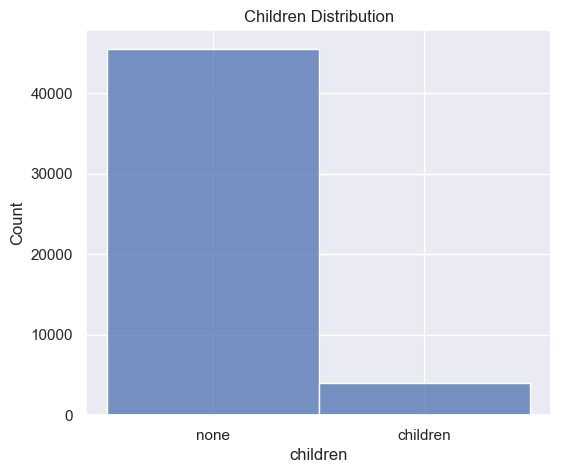

In [12]:
fig, axes = plt.subplots(figsize=(6, 5))
sns.histplot(data=hotels, x = "children")
plt.title('Children Distribution')
plt.show()

It can be seen that the variable that will be used as the target "children" is unbalanced, the positive class to be predicted represents around 8% of the total data set, so it means a challenge when training the model.

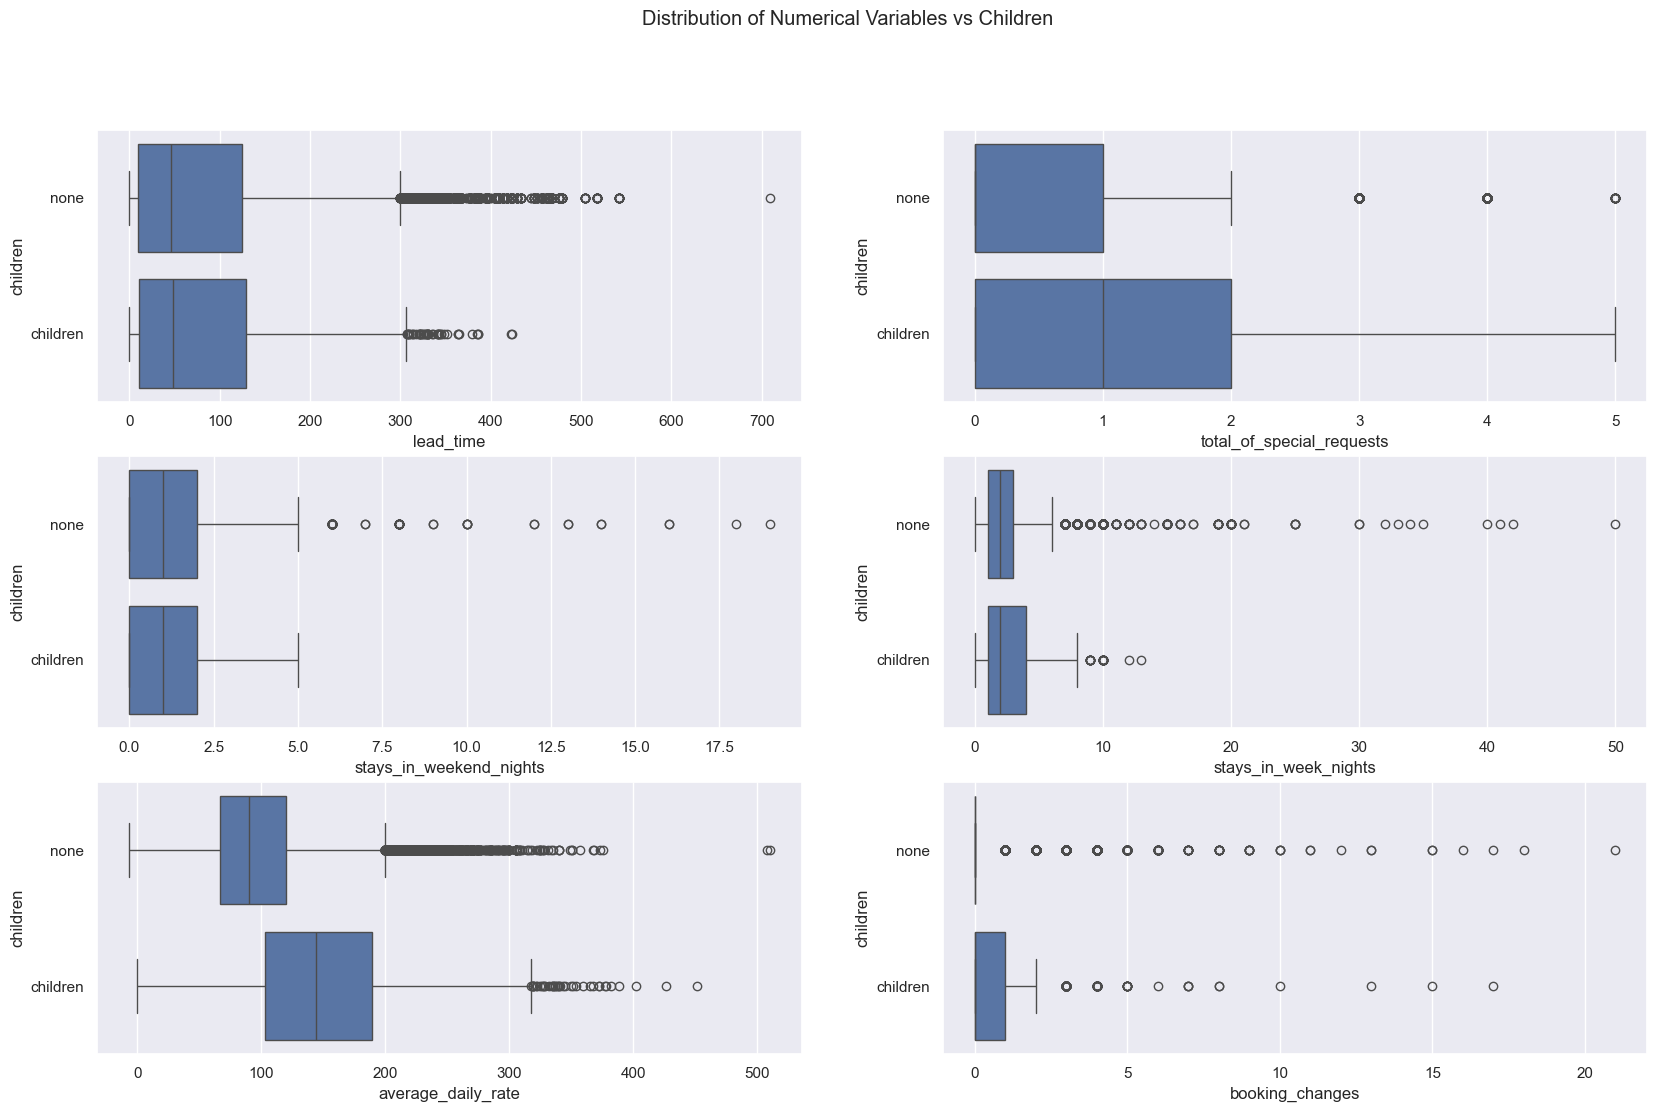

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(data=hotels, x="lead_time", y="children", ax=axes[0,0])
sns.boxplot(data=hotels, x="total_of_special_requests", y="children", ax=axes[0,1])
sns.boxplot(data=hotels, x="stays_in_weekend_nights", y="children", ax=axes[1,0])
sns.boxplot(data=hotels, x="stays_in_week_nights", y="children", ax=axes[1,1])
sns.boxplot(data=hotels, x="average_daily_rate", y="children", ax=axes[2,0])
sns.boxplot(data=hotels, x="booking_changes", y="children", ax=axes[2,1])


fig.suptitle('Distribution of Numerical Variables vs Children')

plt.show()

* The variables lead_time and stays_in_weekend_nights have identical distributions for users with or without children, so they will not be useful when classifying.
* Users with children have a higher average for most numerical variables. They tend to have more special requests, make more reservation changes, leave a higher average daily rating, and tend to stay on weekday nights more frequently than guests without children.

In [14]:
hotels[["children","assigned_room_type"]].value_counts()

children  assigned_room_type
none      A                     26233
          D                     11728
          E                      3592
          F                      1194
children  A                       973
none      B                       928
          C                       918
children  D                       784
          F                       627
          G                       607
none      G                       563
children  C                       371
          E                       305
          H                       179
          B                       148
none      H                       131
          I                       131
          K                       117
children  I                        17
          K                         6
dtype: int64

In [15]:
hotels[["children","reserved_room_type"]].value_counts()

children  reserved_room_type
none      A                     33042
          D                      8153
          E                      2801
children  A                      1516
none      F                       668
children  F                       620
          G                       553
          D                       464
none      B                       352
          G                       334
children  C                       291
          E                       268
          H                       171
          B                       134
none      C                       122
          H                        61
          L                         2
dtype: int64

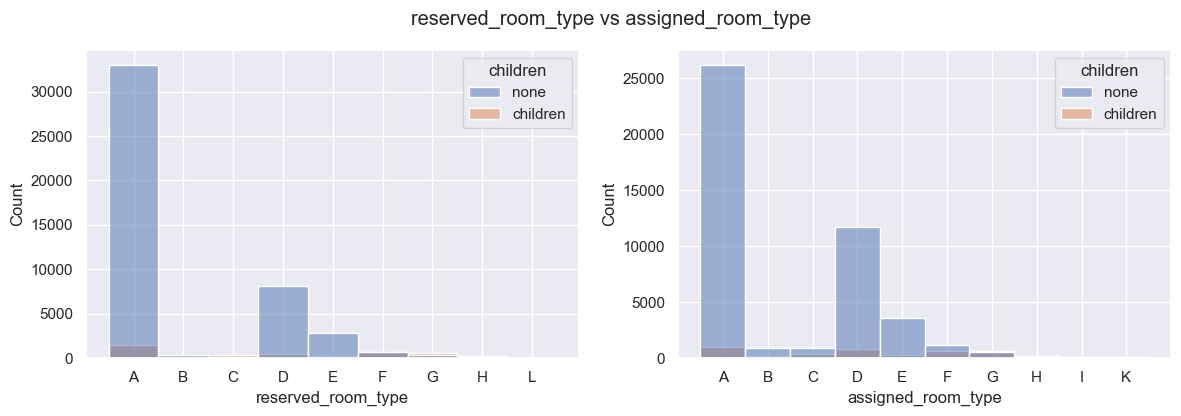

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(data=hotels.sort_values("reserved_room_type"), x = "reserved_room_type",  hue="children", ax=axes[0])
sns.histplot(data=hotels.sort_values("assigned_room_type"), x = "assigned_room_type",  hue="children", ax=axes[1])

fig.suptitle('reserved_room_type vs assigned_room_type')
plt.show()

* Room g seems to be preferred by people with children so it can be a good classifier
* Room types I and K were not reserved but were still assigned
* Room type L was not assigned to anyone despite being reserved

In [17]:

# Number of guests per month
guestsbymonth =  hotels.groupby("month_visit").agg(
     quant_guests_g=('month_visit', 'count'),
     avg_month_rate_g=('average_daily_rate', 'mean')
).reset_index()

# Number of guests with or without children
childrenbymonth =  hotels.groupby(["month_visit", "children"]).agg(
     quant_guests=('month_visit', 'count'),
     avg_month_rate=('average_daily_rate', 'mean')
).reset_index()

# Separating guests without children
no_children = (childrenbymonth[childrenbymonth["children"]== "none"]
               .copy()
               .rename(columns={"quant_guests": "quant_guests_nc", "avg_month_rate": "avg_month_rate_nc"})
               .drop(columns="children"))

# Separating guests with children
children = (childrenbymonth[childrenbymonth["children"]== "children"]
            .copy()
            .rename(columns={"quant_guests": "quant_guests_c", "avg_month_rate": "avg_month_rate_c"})
            .drop(columns="children"))


# Unifying everything in a single dataframe
guestsbymonth = guestsbymonth.merge(children, how="left", on="month_visit").merge(no_children, how="left", on="month_visit")
# Creating a percentage of guests with and without children to the total for each month
guestsbymonth["perc_guests_children"] = (guestsbymonth["quant_guests_c"] / guestsbymonth["quant_guests_g"]).round(2)
guestsbymonth["perc_guests_nochildren"] = (guestsbymonth["quant_guests_nc"] / guestsbymonth["quant_guests_g"]).round(2)
guestsbymonth

,month_visit,quant_guests_g,avg_month_rate_g,quant_guests_c,avg_month_rate_c,quant_guests_nc,avg_month_rate_nc,perc_guests_children,perc_guests_nochildren
0,2015-07,974,110.338152,97,152.613608,877,105.662303,0.10,0.90
1,2015-08,1490,115.814336,174,154.845115,1316,110.653731,0.12,0.88
2,2015-09,2006,98.485892,77,136.267922,1929,96.977745,0.04,0.96
3,2015-10,2124,81.444793,78,105.462692,2046,80.529154,0.04,0.96
4,2015-11,1217,59.682260,40,75.205250,1177,59.154715,0.03,0.97
5,2015-12,1270,72.416638,92,96.747065,1178,70.516469,0.07,0.93
6,2016-01,1142,63.025849,46,80.190652,1096,62.305429,0.04,0.96
7,2016-02,1667,69.426233,129,101.443023,1538,66.740819,0.08,0.92
8,2016-03,2212,75.461433,161,111.371988,2051,72.642516,0.07,0.93
9,2016-04,2203,87.243749,143,129.933497,2060,84.280335,0.06,0.94


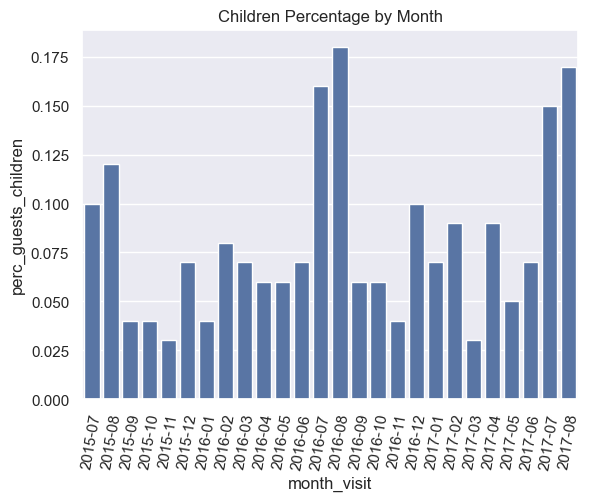

In [25]:

sns.barplot(data=guestsbymonth, x="month_visit", y="perc_guests_children", )
plt.xticks(rotation=80)
plt.title("Children Percentage by Month")
plt.show()

It can be seen that the percentage of guests with children increases in July and August, which coincides with the children's summer vacation at school, so a good predictor for the model could be a variable that indicates whether The guests stayed those months of the year.

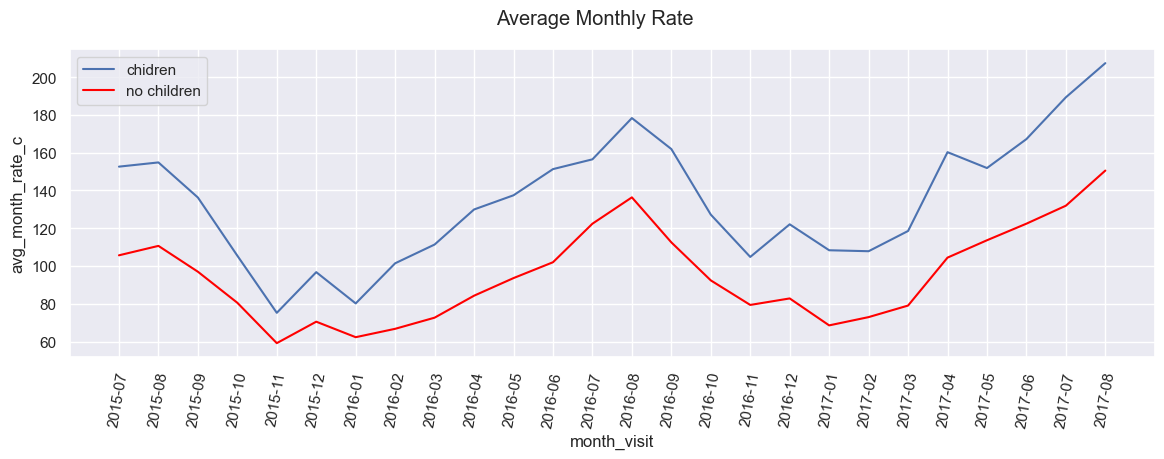

In [18]:
fig, axes = plt.subplots( figsize=(14, 4))

sns.lineplot(data=guestsbymonth,x = "month_visit", y = "avg_month_rate_c",  label="chidren")
sns.lineplot(data=guestsbymonth, x = "month_visit"  , y = "avg_month_rate_nc", color = "red", label="no children")
plt.xticks(rotation=80)
fig.suptitle('Average Monthly Rate')
plt.show()

Users with children have, on average, a higher Average Daily Rate than those who do not have children, and this is sustained over the months because at no time do the lines overlap. The Months with the highest Average Daily Rate coincide with the summer vacation months when more guests with children stay, so it must be due to special activities in those months that increase the perceived value for both types of guests, both for those Who have children as well as those who don't.

## Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

In [19]:
# Creating a new variable to represent holiday seasonality
summer = [7,8]
hotels["summer_vacations"] = np.where(hotels["arrival_date"].dt.month.isin(summer), "summer_vacation","none")
hotels.drop(columns=["arrival_date", "month_visit"], inplace=True)

In [20]:
X= hotels.drop(columns="children")
y= np.where(hotels.children=="children",1,0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
class CorrelationThreshold(SelectorMixin, BaseEstimator):
    "Class for selection of variables by correlation threshold."
    
    def __init__(
            self, 
            threshold: bool = 0.9 
            ):
        self.threshold = threshold

    def fit(self, X, y=None):
        df_ = pd.DataFrame(X).copy()
        
        corr_mat_np = pd.DataFrame(
            np.corrcoef(df_.values, rowvar=False), 
            columns=df_.columns, 
            index=df_.columns
        )

        corr_matrix = np.absolute(corr_mat_np)
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        upper = pd.DataFrame(upper)
        self.to_drop = [
            column for column in upper.columns if any(upper[column] > self.threshold)
        ]
        self.seleccion = list(set(pd.DataFrame(X).columns) - set(self.to_drop))
        self.columnas = df_.columns
        return self

    def _get_support_mask(self):
        seleccion_vars = [i in self.seleccion for i in self.columnas]
        return np.array(seleccion_vars)

In [22]:
UMBRAL_CORRELACION = 0.9
UMBRAL_VARIANZA = 0.05
MIN_FRECUENCIA = 0.05
categorical_high_dim = ["country"]
categorical_columns = X_train.select_dtypes(["object"]).drop(columns="country").columns.to_list()
numeric_columns = X_train.select_dtypes(["int", "float"]).columns.to_list()


numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0, add_indicator=True)),
    ('correlation_threshold', CorrelationThreshold(threshold=UMBRAL_CORRELACION))  
])

non_numeric_transformer = Pipeline(
[
    ("imputation_na", SimpleImputer(
        missing_values=np.nan, strategy="most_frequent", add_indicator=True)),
    ("imputation_none", SimpleImputer(
        missing_values= None, strategy="most_frequent", add_indicator=True)),    
    ("ohe", OneHotEncoder(
        handle_unknown="infrequent_if_exist",
        min_frequency=MIN_FRECUENCIA, drop="if_binary", sparse_output= False )),
    ("varianza", VarianceThreshold(threshold=UMBRAL_VARIANZA))
]
)

non_numeric_hihgdimensionality_transformer = Pipeline(
[
    ("catboostencoder", CatBoostEncoder(handle_unknown="value")),
]
)

preproc = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('non_num', non_numeric_transformer, categorical_columns),
    ('non_num_hd', non_numeric_hihgdimensionality_transformer, categorical_high_dim),
])

preprocessor = Pipeline(steps=[("preprocessor", preproc),
])


### LightGBM

In [23]:
# Model
model_lgbm = LGBMClassifier(
    objective="binary",
    random_state=58,
    is_unbalance= True,
    max_depth=8,
    reg_alpha=100,
    n_jobs=-1,
    n_estimators=1000,
    verbose=-1,
)

# Pipeline
pipe_lgbm = Pipeline([
    ("preproc", preprocessor), 
    ("model", model_lgbm)
    ],
    verbose=True)

pipe_lgbm.fit(X_train, y_train)


pipe_lgbm

c:\Users\John\anaconda3\envs\automl\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but CorrelationThreshold was fitted without feature names
  warnings.warn(


[Pipeline] ........... (step 1 of 2) Processing preproc, total=   1.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.4s


Pipeline(steps=[('preproc',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  fill_value=0,
                                                                                                  strategy='constant')),
                                                                                   ('correlation_threshold',
                                                                                    CorrelationThreshold())]),
                                                                   ['lead_time',
                                                                    'stays_in_weekend_nights',
                                                                    'stays_in_week_nights',
                                                                    'adults',
                                                                    'is_repeated_guest',
                                                                    'previous_cance...
                                                                    'assigned_room_type',
                                                                    'deposit_type',
                                                                    'customer_type',
                                                                    'required_car_parking_spaces',
                                                                    'summer_vacations']),
                                                                  ('non_num_hd',
                                                                   Pipeline(steps=[('catboostencoder',
                                                                                    CatBoostEncoder())]),
                                                                   ['country'])]))])),
                ('model',
                 LGBMClassifier(is_unbalance=True, max_depth=8,
                                n_estimators=1000, n_jobs=-1,
                                objective='binary', random_state=58,
                                reg_alpha=100, verbose=-1))],
         verbose=True)

c:\Users\John\anaconda3\envs\automl\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but CorrelationThreshold was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.84      0.91      9108
           1       0.31      0.81      0.45       803

    accuracy                           0.84      9911
   macro avg       0.65      0.83      0.68      9911
weighted avg       0.93      0.84      0.87      9911



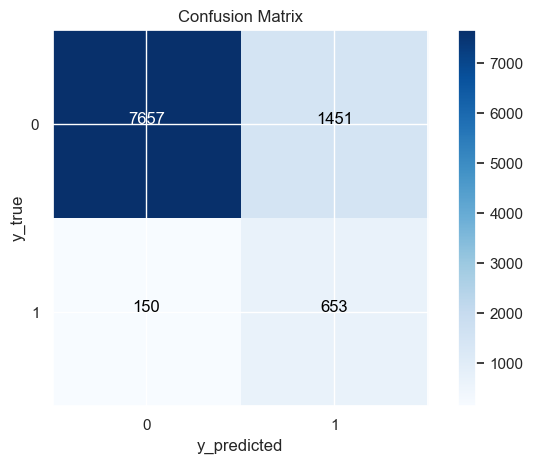

In [24]:
y_pred_test = pipe_lgbm.predict(X_test)
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
# Configure the graph
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the axes
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add the values ​​of the matrix in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('y_true')
plt.xlabel('y_predicted')
plt.tight_layout()
plt.show()

### XGBoost

In [30]:
# Model
model_xgb = XGBClassifier(
    random_state=58,
    scale_pos_weight= 11,
    max_depth=8,
    reg_alpha=100,
    n_jobs=-1,
    n_estimators=1000,
)

# Pipeline
pipe_xgb = Pipeline([
    ("preproc", preprocessor), 
    ("model", model_xgb)
    ],
    verbose=True)

pipe_xgb.fit(X_train, y_train)


pipe_xgb

c:\Users\John\anaconda3\envs\automl\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but CorrelationThreshold was fitted without feature names
  warnings.warn(


[Pipeline] ........... (step 1 of 2) Processing preproc, total=   1.4s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.7s


Pipeline(steps=[('preproc',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  fill_value=0,
                                                                                                  strategy='constant')),
                                                                                   ('correlation_threshold',
                                                                                    CorrelationThreshold())]),
                                                                   ['lead_time',
                                                                    'stays_in_weekend_nights',
                                                                    'stays_in_week_nights',
                                                                    'adults',
                                                                    'is_repeated_guest',
                                                                    'previous_cance...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=-1,
                               num_parallel_tree=None, random_state=58, ...))],
         verbose=True)

c:\Users\John\anaconda3\envs\automl\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but CorrelationThreshold was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9108
           1       0.33      0.81      0.47       803

    accuracy                           0.85      9911
   macro avg       0.65      0.83      0.69      9911
weighted avg       0.93      0.85      0.88      9911



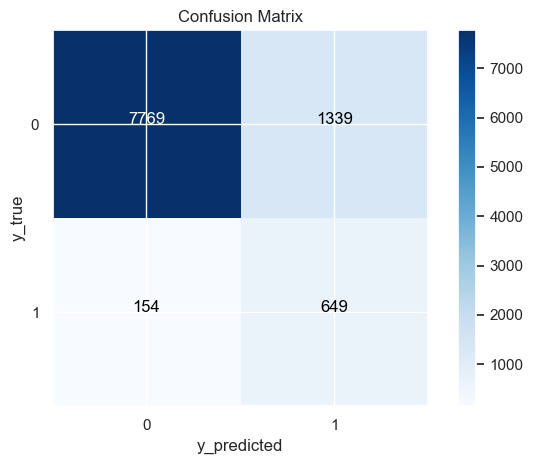

In [31]:
y_pred_test = pipe_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
# Configure the graph
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the axes
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add the values ​​of the matrix in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('y_true')
plt.xlabel('y_predicted')
plt.tight_layout()
plt.show()

### Random Forest

In [32]:

# Model
model_rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=58,
    max_depth=8,
    n_estimators=100,
    verbose=0,
)

# Pipeline
pipe_rf = Pipeline([
    ("preproc", preprocessor), 
    ("model", model_rf)
    ],
    verbose=True)

pipe_rf.fit(X_train, y_train)

pipe_rf

c:\Users\John\anaconda3\envs\automl\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but CorrelationThreshold was fitted without feature names
  warnings.warn(


[Pipeline] ........... (step 1 of 2) Processing preproc, total=   2.5s
[Pipeline] ............. (step 2 of 2) Processing model, total=   6.9s


Pipeline(steps=[('preproc',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  fill_value=0,
                                                                                                  strategy='constant')),
                                                                                   ('correlation_threshold',
                                                                                    CorrelationThreshold())]),
                                                                   ['lead_time',
                                                                    'stays_in_weekend_nights',
                                                                    'stays_in_week_nights',
                                                                    'adults',
                                                                    'is_repeated_guest',
                                                                    'previous_cance...
                                                                    'market_segment',
                                                                    'distribution_channel',
                                                                    'reserved_room_type',
                                                                    'assigned_room_type',
                                                                    'deposit_type',
                                                                    'customer_type',
                                                                    'required_car_parking_spaces',
                                                                    'summer_vacations']),
                                                                  ('non_num_hd',
                                                                   Pipeline(steps=[('catboostencoder',
                                                                                    CatBoostEncoder())]),
                                                                   ['country'])]))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        random_state=58))],
         verbose=True)

c:\Users\John\anaconda3\envs\automl\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but CorrelationThreshold was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.87      0.92      9108
           1       0.34      0.75      0.47       803

    accuracy                           0.86      9911
   macro avg       0.66      0.81      0.70      9911
weighted avg       0.92      0.86      0.88      9911



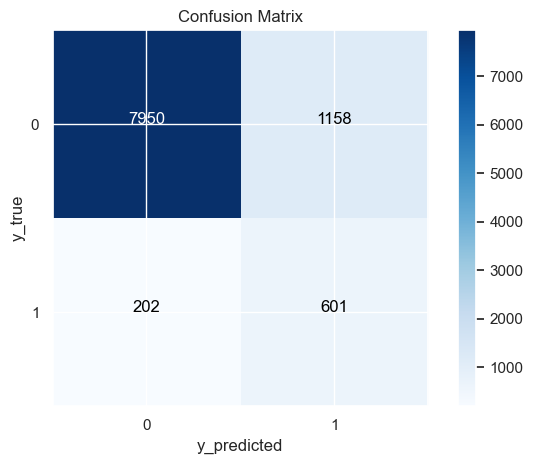

In [34]:
y_pred_test = pipe_rf.predict(X_test)
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
# Configure the graph
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the axes
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add the values ​​of the matrix in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('y_true')
plt.xlabel('y_predicted')
plt.tight_layout()
plt.show()

In [108]:
X_test_processed = preprocessor.transform(X_test)
X_test_processed

c:\Users\John\anaconda3\envs\automl\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but CorrelationThreshold was fitted without feature names
  warnings.warn(


,num__lead_time,num__stays_in_weekend_nights,num__stays_in_week_nights,num__adults,num__is_repeated_guest,num__previous_cancellations,num__previous_bookings_not_canceled,num__booking_changes,num__days_in_waiting_list,num__average_daily_rate,num__total_of_special_requests,non_num__hotel_Resort_Hotel,non_num__meal_BB,non_num__meal_HB,non_num__meal_SC,non_num__market_segment_Corporate,non_num__market_segment_Direct,non_num__market_segment_Groups,non_num__market_segment_Offline_TA/TO,non_num__market_segment_Online_TA,non_num__distribution_channel_Corporate,non_num__distribution_channel_Direct,non_num__distribution_channel_TA/TO,non_num__reserved_room_type_A,non_num__reserved_room_type_D,non_num__reserved_room_type_E,non_num__reserved_room_type_infrequent_sklearn,non_num__assigned_room_type_A,non_num__assigned_room_type_D,non_num__assigned_room_type_E,non_num__assigned_room_type_infrequent_sklearn,non_num__customer_type_Transient,non_num__customer_type_Transient-Party,non_num__required_car_parking_spaces_parking,non_num__summer_vacations_summer_vacation,non_num_hd__country
6384,33.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,90.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.078784
34333,9.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,97.02,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.079824
12793,26.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,75.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.078784
44807,6.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,45.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.082377
42923,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,104.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.108783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48106,149.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,122.04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.086524
31984,182.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,58.20,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.090389
48723,13.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,35.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.082377
33535,256.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,115.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.047363


## Part III - Results & Conclusions

Insights Found
* It was observed that the largest number of clients staying in the hotels under study do not have children, while clients with children are close to 8%.
* Guests with children tend to have more special requests, make more reservation changes, leave a higher average daily rating, and tend to stay on weekday nights more frequently than guests without children.
* During July and August during the summer holidays, the hotels are most crowded, and the proportion of clients with children increases during those dates.

Models
* 3 tree assembly models were tested to try to predict, based on the available information, which clients have children.
* The ones that obtained the best results were Random Forest and XGBoost, to evaluate them the f1 metric was used, which weighs between precision (the percentage of times in which the model managed to correctly predict that a client has children) and recall (the percentage of the total clients with children that the model could identify).
 * f1 Random Forest: 0.47
 * f1 XGBoost: 0.47
 * f1 LightGBM:0.45
* The summer_vacations variable was created to identify clients who stayed during July and August since in those months there is the highest proportion of clients with children.



Below are the variables that most influenced the Random Forest model using Shap Values.

PermutationExplainer explainer: 9912it [41:22,  3.99it/s]                           


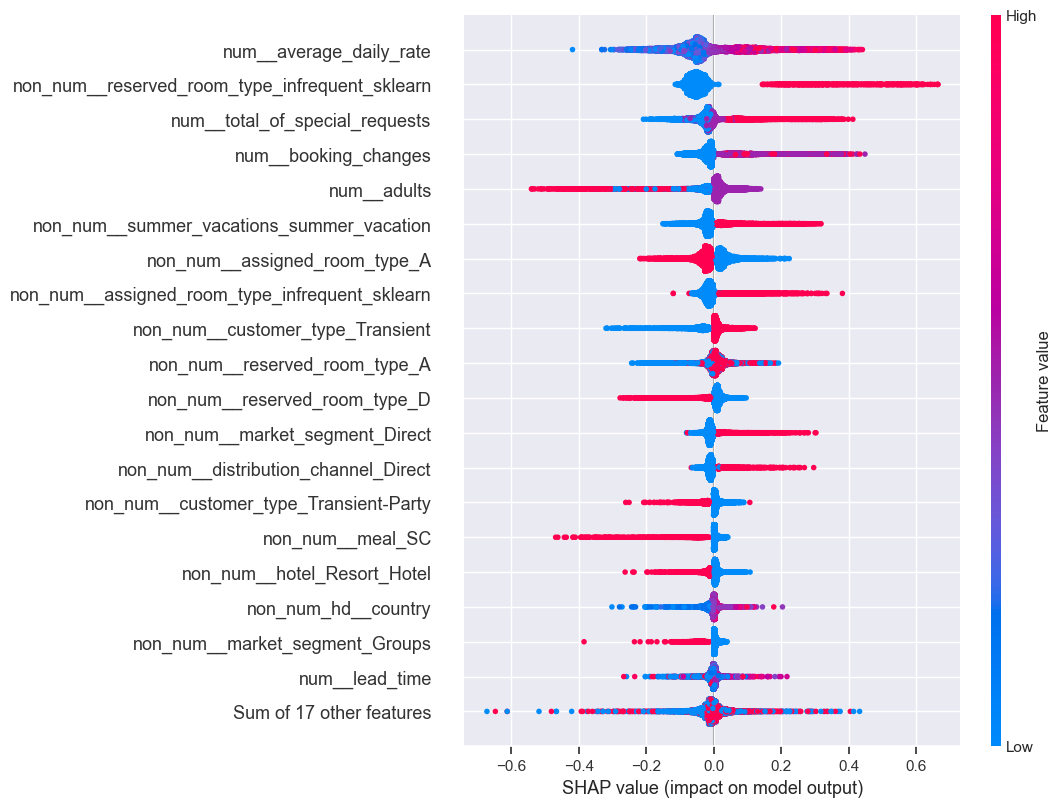

In [120]:
# Fits the explainer
explainer = shap.Explainer(pipe_rf[-1].predict, X_test_processed)
shap_values = explainer(X_test_processed)

shap.plots.beeswarm(shap_values, max_display=20)

Shap values ​​are used to help with model interpretability
* On the y-axis the importance of the variables in the model is found in descending order.
* Blue indicates a low value for the variable and red indicates a high value.
* The x-axis shows the shap values, values ​​to the right of zero indicate that this variable increases the probability that clients have children, and values ​​to the left indicate the opposite.

In the graph we can see the following:
* The Average Daily Rate is the variable that best allows us to identify clients with children. This was expected because in previous graphs it was observed that these clients consistently had higher values ​​in each of the study months.
* High values ​​of Special Requests and Booking Changes also increase the probability that the client has children.
* On the other hand, the number of adults in the room decreases the probability of having children, furthermore, being assigned to type A rooms or having reserved type D rooms reduces this probability.
* The variable created Summer Vacation had the expected effect and increased the probability of clients having children.